In [268]:
import pandas as pd

# CSV 파일을 데이터프레임으로 읽어오기
df = pd.read_csv('../data/data_fall.csv')

# 데이터프레임 확인
df.head()

,No,Heartbeat,Temperature,Spo2,UserCode,GyroX,GyroY,GyroZ,Time,Label
0,1,142,36.7,98,27,2.60,9.66,1.035146,1.240000e+13,fall
1,2,141,36.6,98,27,2.68,9.53,0.503953,1.240000e+13,fall
2,3,128,36.8,97,27,3.49,8.89,0.762740,1.240000e+13,fall
3,4,133,36.8,99,27,3.64,9.38,0.926184,1.240000e+13,fall
4,5,137,36.7,96,27,2.91,9.34,1.035146,1.240000e+13,fall


In [269]:
unique_user_codes = df['UserCode'].unique()
print(len(unique_user_codes),'명')
print(unique_user_codes)

21 명
[27 36  5 35 18 33 16 29 32  6 13 20 24 12  4 30 34  8 31 21  3]


In [270]:
# Time 필드 드랍
df = df.drop('Time', axis=1)

# 업데이트된 데이터프레임 확인
print(df)

          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
0          1        142         36.7    98        27   2.60   9.66  1.035146  \
1          2        141         36.6    98        27   2.68   9.53  0.503953   
2          3        128         36.8    97        27   3.49   8.89  0.762740   
3          4        133         36.8    99        27   3.64   9.38  0.926184   
4          5        137         36.7    96        27   2.91   9.34  1.035146   
...      ...        ...          ...   ...       ...    ...    ...       ...   
54871  54872        139         36.7    97         3   1.38   0.00  9.660000   
54872  54873        140         36.7    99         3   1.38  -0.04  9.660000   
54873  54874        139         36.7    99         3   1.50  -0.08  9.620000   
54874  54875        138         36.6    97         3   1.42  -0.04  9.660000   
54875  54876        128         36.7    96         3   1.46   0.00  9.660000   

      Label  
0      fall  
1      fall

In [271]:
# Label 필드의 속성별 개수 구하기
UserCode_counts = df['UserCode'].value_counts()

# 결과 출력
print(UserCode_counts)

UserCode
20    15644
33     3248
32     3059
16     2984
8      2699
36     2500
29     2319
12     2289
31     2148
27     2099
6      1679
5      1664
21     1609
3      1609
35     1599
34     1575
30     1559
18     1467
4      1257
13     1179
24      690
Name: count, dtype: int64


In [246]:
import pandas as pd
import numpy as np

# UserCode 별로 Temperature 값을 업데이트하는 함수
def update_temperature(subset):
    total_count = len(subset)

    # Temperature 30% 37.1~39.9
    temperature_30_percent = int(total_count * 0.3)
    subset_30_percent = subset.sample(n=temperature_30_percent)
    subset_30_percent['Temperature'] = np.random.uniform(37.1, 39.9, temperature_30_percent)

    # Temperature 60% 36.0~37.0
    temperature_60_percent = int(total_count * 0.6)
    subset_60_percent = subset.sample(n=temperature_60_percent)
    subset_60_percent['Temperature'] = np.random.uniform(36.0, 37.0, temperature_60_percent)

    # Temperature 10% 34.0~35.0
    temperature_10_percent = int(total_count * 0.1)
    subset_10_percent = subset.sample(n=temperature_10_percent)
    subset_10_percent['Temperature'] = np.random.uniform(34.0, 35.0, temperature_10_percent)

    # 업데이트된 subset 반환
    return pd.concat([subset_30_percent, subset_60_percent, subset_10_percent])

# UserCode 별로 값을 업데이트하는 함수
def update_dataframe(df):
    unique_user_codes = df['UserCode'].unique()

    updated_dfs = []
    for user_code in unique_user_codes:
        subset = df[df['UserCode'] == user_code]
        updated_subset = update_temperature(subset)
        updated_dfs.append(updated_subset)

    updated_df = pd.concat(updated_dfs)

    return updated_df

# 데이터프레임 값 업데이트
updated_df = update_dataframe(df)

# 업데이트된 데이터프레임 확인
print(updated_df)

          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
1459    1460        140    38.733862    97        27   3.26   9.28  1.076008  \
478      479        129    38.863911    99        27   3.06   9.38  1.076008   
2044    2045        138    38.400300    99        27   3.17   9.28  1.116869   
702      703        129    38.076679    99        27   3.06   9.38  1.144109   
1453    1454        137    39.110905    95        27   3.30   9.30  1.116869   
...      ...        ...          ...   ...       ...    ...    ...       ...   
54478  54479        142    34.003205    96         3   1.23  -0.08  9.700000   
54597  54598        139    34.336388    97         3   1.12  -0.08  9.700000   
54256  54257        133    34.029234    99         3   1.38  -0.04  9.620000   
53612  53613        137    34.665358    96         3   1.57   0.15  9.660000   
53589  53590        135    34.863441    98         3   1.50   0.23  9.660000   

      Label  
1459   fall  
478    fall

In [247]:
# 비율 계산 함수
def calculate_ratio(subset):
    total_count = len(subset)

    # Temperature 비율 계산
    temperature_34_35_count = len(subset[(subset['Temperature'] >= 34.0) & (subset['Temperature'] <= 35.0)])
    temperature_36_37_count = len(subset[(subset['Temperature'] >= 36.0) & (subset['Temperature'] <= 37.0)])
    temperature_37_39_count = len(subset[(subset['Temperature'] >= 37.1) & (subset['Temperature'] <= 39.9)])

    temperature_34_35_ratio = temperature_34_35_count / total_count
    temperature_36_37_ratio = temperature_36_37_count / total_count
    temperature_37_39_ratio = temperature_37_39_count / total_count

    # Heartbeat 비율 계산
    heartbeat_45_55_count = len(subset[(subset['Heartbeat'] >= 45) & (subset['Heartbeat'] <= 55)])
    heartbeat_60_85_count = len(subset[(subset['Heartbeat'] >= 60) & (subset['Heartbeat'] <= 85)])
    heartbeat_100_140_count = len(subset[(subset['Heartbeat'] >= 100) & (subset['Heartbeat'] <= 140)])

    heartbeat_45_55_ratio = heartbeat_45_55_count / total_count
    heartbeat_60_85_ratio = heartbeat_60_85_count / total_count
    heartbeat_100_140_ratio = heartbeat_100_140_count / total_count

    return temperature_34_35_ratio, temperature_36_37_ratio, temperature_37_39_ratio, heartbeat_45_55_ratio, heartbeat_60_85_ratio, heartbeat_100_140_ratio


# UserCode 별로 비율 계산 및 출력
for user_code in unique_user_codes:
    subset = updated_df[updated_df['UserCode'] == user_code]
    temperature_34_35_ratio, temperature_36_37_ratio, temperature_37_39_ratio, heartbeat_45_55_ratio, heartbeat_60_85_ratio, heartbeat_100_140_ratio = calculate_ratio(subset)

    print(f"UserCode {user_code}의 비율:")
    print(f"Temperature 34.0~35.0: {temperature_34_35_ratio:.2%}")
    print(f"Temperature 36.0~37.0: {temperature_36_37_ratio:.2%}")
    print(f"Temperature 37.1~39.9: {temperature_37_39_ratio:.2%}")
    print(f"Heartbeat 45~55: {heartbeat_45_55_ratio:.2%}")
    print(f"Heartbeat 60~85: {heartbeat_60_85_ratio:.2%}")
    print(f"Heartbeat 100~140: {heartbeat_100_140_ratio:.2%}")
    print()

UserCode 27의 비율:
Temperature 34.0~35.0: 9.97%
Temperature 36.0~37.0: 60.04%
Temperature 37.1~39.9: 30.00%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 86.50%

UserCode 36의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 60.00%
Temperature 37.1~39.9: 30.00%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 85.72%

UserCode 5의 비율:
Temperature 34.0~35.0: 9.98%
Temperature 36.0~37.0: 60.01%
Temperature 37.1~39.9: 30.01%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 86.41%

UserCode 35의 비율:
Temperature 34.0~35.0: 9.96%
Temperature 36.0~37.0: 60.05%
Temperature 37.1~39.9: 29.99%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 84.53%

UserCode 18의 비율:
Temperature 34.0~35.0: 9.96%
Temperature 36.0~37.0: 60.03%
Temperature 37.1~39.9: 30.01%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 0.00%
Heartbeat 100~140: 86.43%

UserCode 33의 비율:
Temperature 34.0~35.0: 9.98%
Temperature 36.0~37.0: 60.01%
Temperature 37.1~39.9: 30.01%

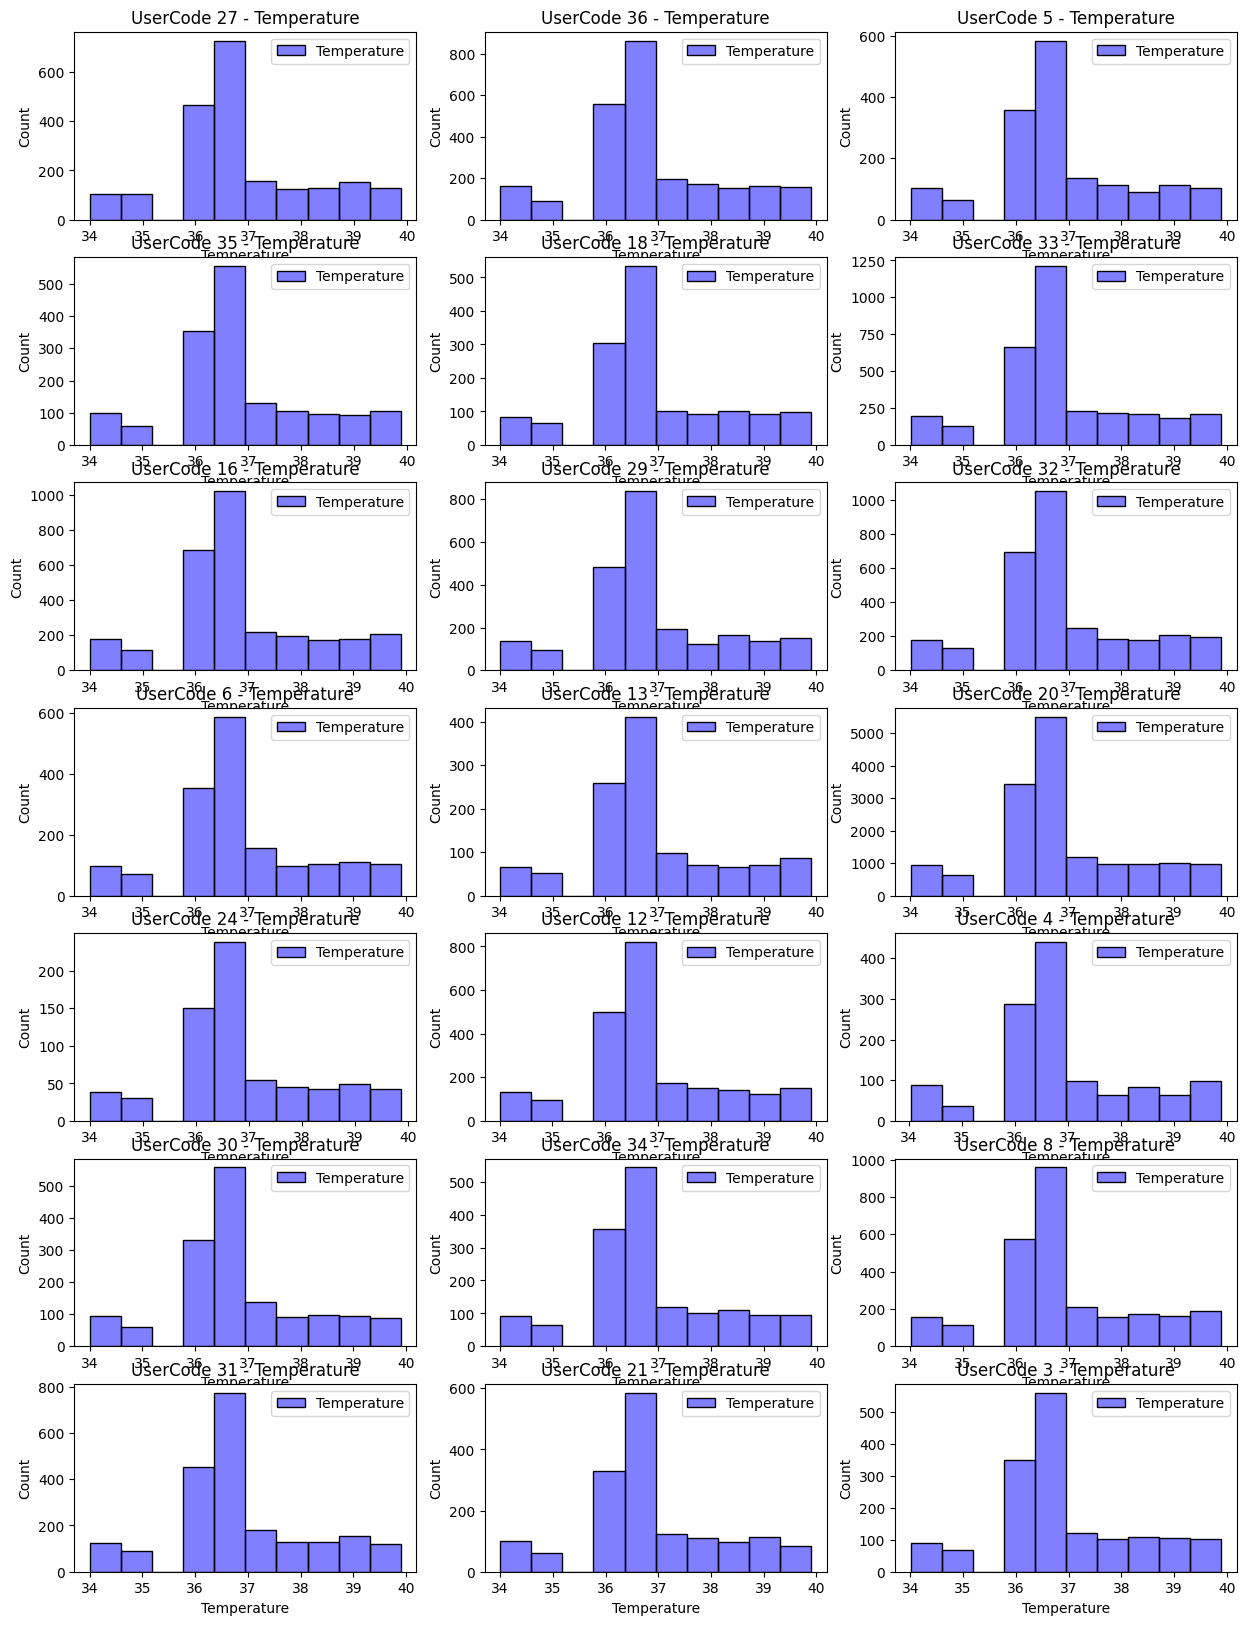

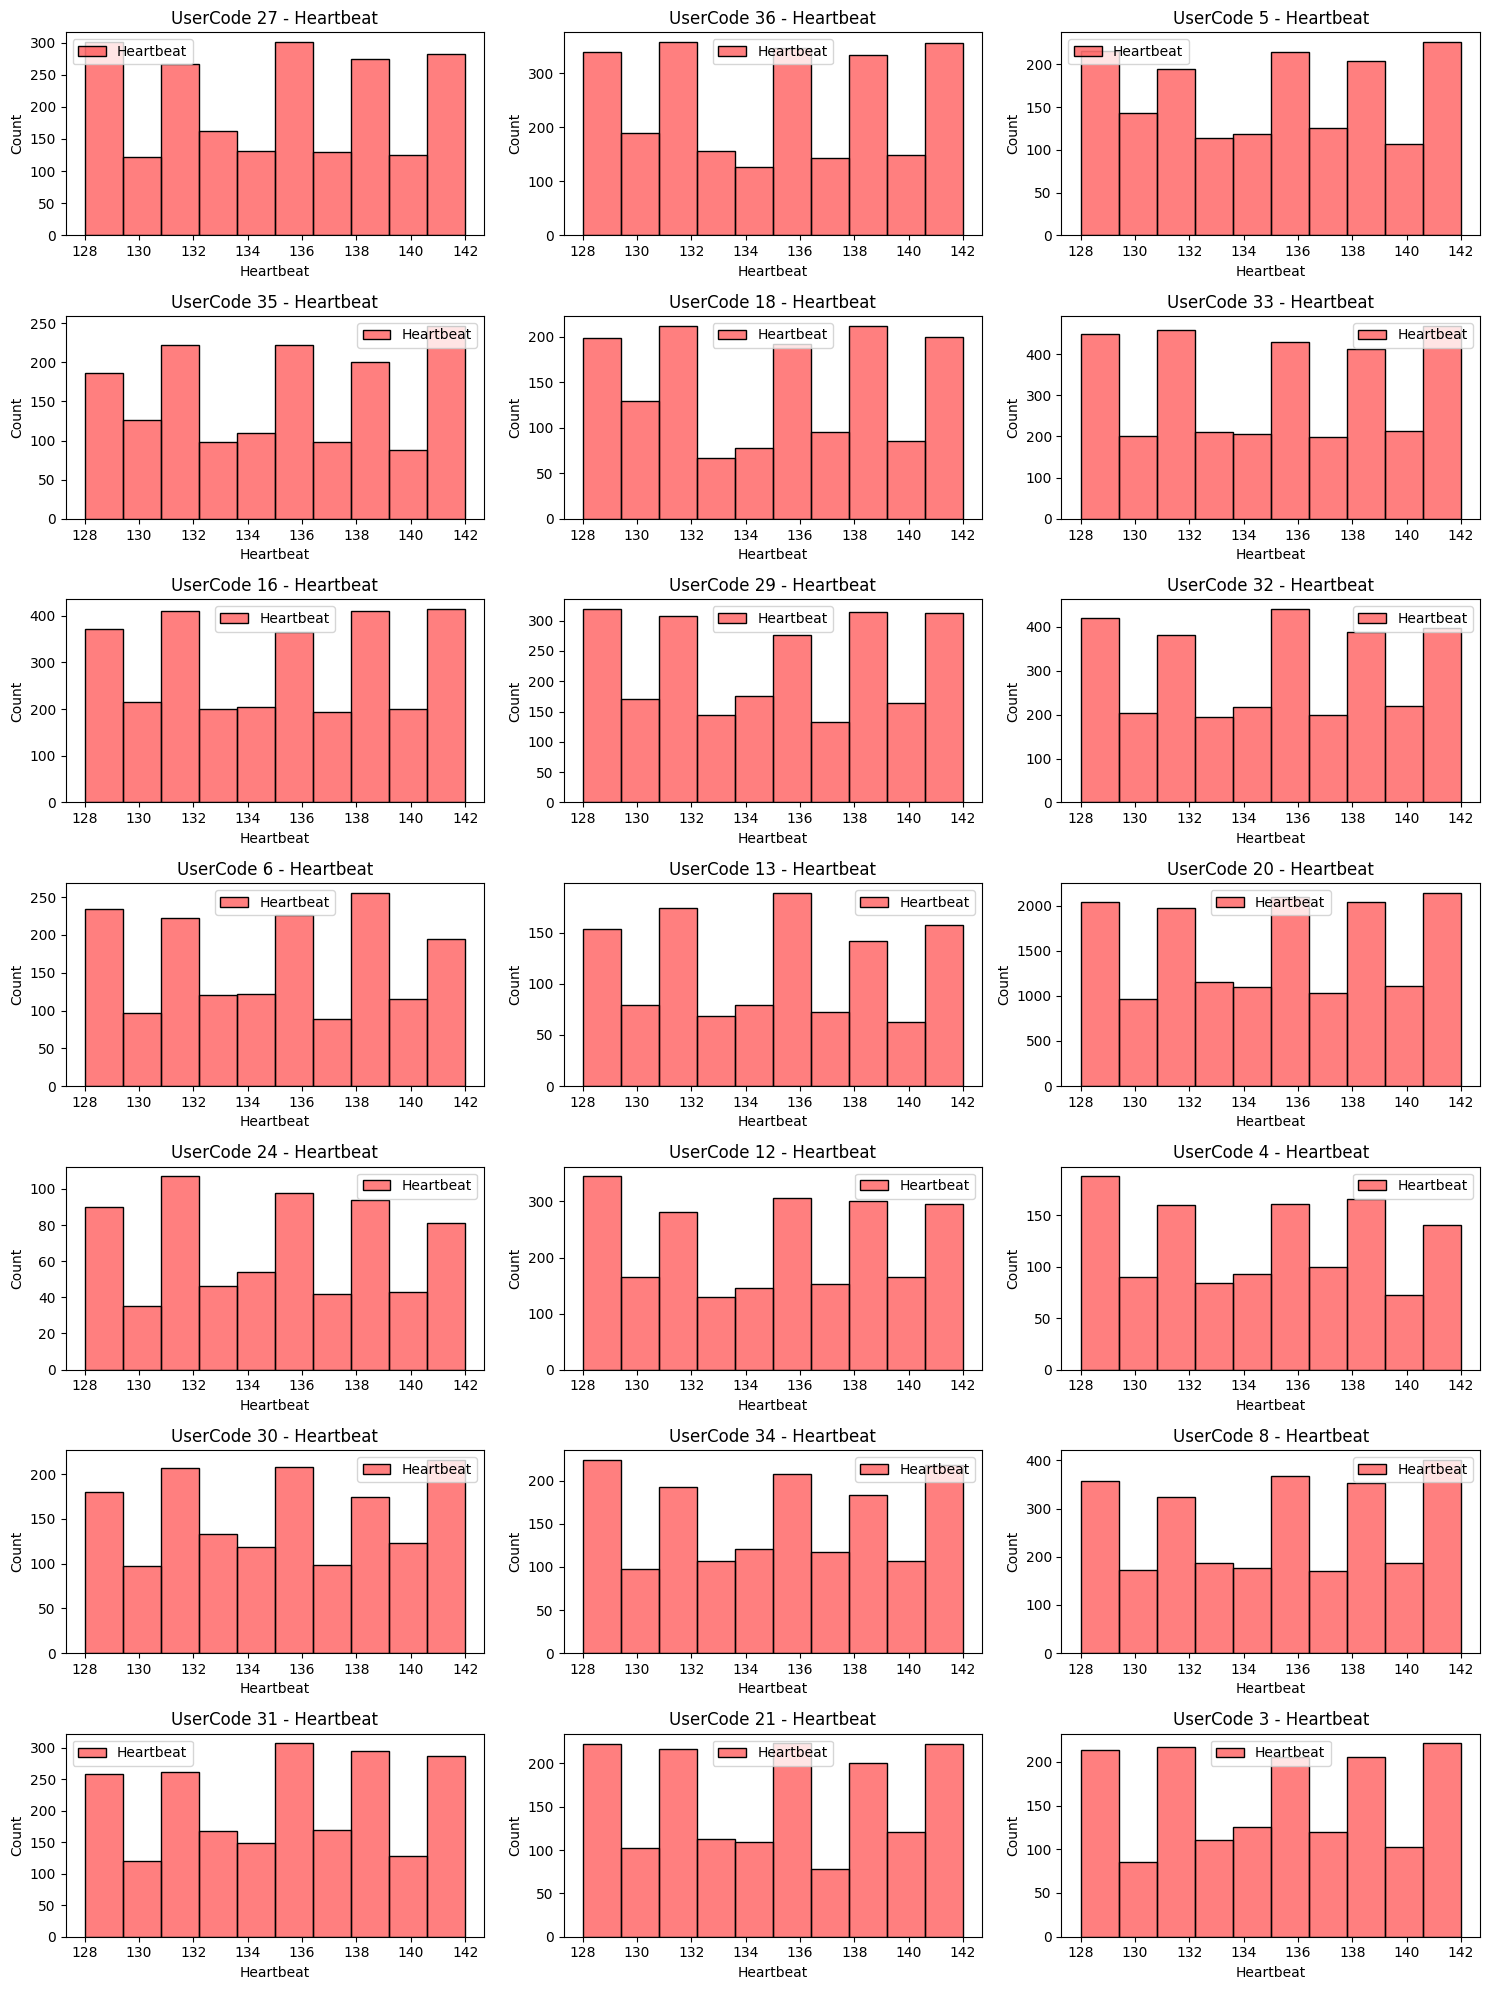

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# UserCode 별로 Temperature 히스토그램 그리기
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, user_code in enumerate(unique_user_codes):
    ax = axes[i]
    subset = updated_df[updated_df['UserCode'] == user_code]
    sns.histplot(subset['Temperature'], bins=10, ax=ax, color='blue', alpha=0.5, label='Temperature')
    ax.set_title(f'UserCode {user_code} - Temperature')
    ax.legend()

# UserCode 별로 Heartbeat 히스토그램 그리기
fig2, axes2 = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
axes2 = axes2.flatten()

for i, user_code in enumerate(unique_user_codes):
    ax = axes2[i]
    subset = updated_df[updated_df['UserCode'] == user_code]
    sns.histplot(subset['Heartbeat'], bins=10, ax=ax, color='red', alpha=0.5, label='Heartbeat')
    ax.set_title(f'UserCode {user_code} - Heartbeat')
    ax.legend()

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()


In [249]:
import pandas as pd
import numpy as np

# 데이터프레임 값 업데이트 함수
def update_dataframe(df):
    df['Heartbeat'] = np.random.randint(60, 85+1, size=len(df))
    return df

# 데이터프레임 값 업데이트
updated_df = update_dataframe(updated_df)

In [250]:
# UserCode 별로 비율 계산 및 출력
for user_code in unique_user_codes:
    subset = updated_df[updated_df['UserCode'] == user_code]
    temperature_34_35_ratio, temperature_36_37_ratio, temperature_37_39_ratio, heartbeat_45_55_ratio, heartbeat_60_85_ratio, heartbeat_100_140_ratio = calculate_ratio(subset)

    print(f"UserCode {user_code}의 비율:")
    print(f"Temperature 34.0~35.0: {temperature_34_35_ratio:.2%}")
    print(f"Temperature 36.0~37.0: {temperature_36_37_ratio:.2%}")
    print(f"Temperature 37.1~39.9: {temperature_37_39_ratio:.2%}")
    print(f"Heartbeat 45~55: {heartbeat_45_55_ratio:.2%}")
    print(f"Heartbeat 60~85: {heartbeat_60_85_ratio:.2%}")
    print(f"Heartbeat 100~140: {heartbeat_100_140_ratio:.2%}")
    print()

UserCode 27의 비율:
Temperature 34.0~35.0: 9.97%
Temperature 36.0~37.0: 60.04%
Temperature 37.1~39.9: 30.00%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 36의 비율:
Temperature 34.0~35.0: 10.00%
Temperature 36.0~37.0: 60.00%
Temperature 37.1~39.9: 30.00%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 5의 비율:
Temperature 34.0~35.0: 9.98%
Temperature 36.0~37.0: 60.01%
Temperature 37.1~39.9: 30.01%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 35의 비율:
Temperature 34.0~35.0: 9.96%
Temperature 36.0~37.0: 60.05%
Temperature 37.1~39.9: 29.99%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 18의 비율:
Temperature 34.0~35.0: 9.96%
Temperature 36.0~37.0: 60.03%
Temperature 37.1~39.9: 30.01%
Heartbeat 45~55: 0.00%
Heartbeat 60~85: 100.00%
Heartbeat 100~140: 0.00%

UserCode 33의 비율:
Temperature 34.0~35.0: 9.98%
Temperature 36.0~37.0: 60.01%
Temperature 37.1~39.9: 3

In [251]:
def update_heartbeat(subset):
    total_count = len(subset)
    subset_copy = subset.copy()

    # Temperature가 37.1이상 40미만인 경우
    temperature_37_40 = subset_copy[(subset_copy['Temperature'] >= 37.1) & (subset_copy['Temperature'] < 40)]
    heartbeat_37_40_count = int(len(temperature_37_40) * 0.4)
    heartbeat_37_40_subset = temperature_37_40.sample(n=heartbeat_37_40_count)
    heartbeat_37_40_subset['Heartbeat'] = np.random.randint(100, 140+1, size=heartbeat_37_40_count)
    subset_copy.update(heartbeat_37_40_subset)

    # Temperature가 36.0이상 37.0미만인 경우
    temperature_36_37 = subset_copy[(subset_copy['Temperature'] >= 36.0) & (subset_copy['Temperature'] < 37.1)]
    heartbeat_36_37_count = int(len(temperature_36_37) * 0.3)
    heartbeat_36_37_subset = temperature_36_37.sample(n=heartbeat_36_37_count)
    heartbeat_36_37_subset['Heartbeat'] = np.random.randint(100, 140+1, size=heartbeat_36_37_count)
    subset_copy.update(heartbeat_36_37_subset)

    # Temperature가 34.0이상 35.0미만인 경우
    temperature_34_35 = subset_copy[(subset_copy['Temperature'] >= 34.0) & (subset_copy['Temperature'] < 35.1)]
    heartbeat_34_35_count = int(len(temperature_34_35) * 0.4)
    heartbeat_34_35_subset = temperature_34_35.sample(n=heartbeat_34_35_count)
    heartbeat_34_35_subset['Heartbeat'] = np.random.randint(45, 55+1, size=heartbeat_34_35_count)
    subset_copy.update(heartbeat_34_35_subset)

    return subset_copy


def update_dataframe(df):
    unique_user_codes = df['UserCode'].unique()

    updated_dfs = []
    for user_code in unique_user_codes:
        subset = df[df['UserCode'] == user_code]
        updated_subset = update_heartbeat(subset)
        updated_dfs.append(updated_subset)

    updated_df = pd.concat(updated_dfs)
    updated_df.reset_index(drop=True, inplace=True)
    return updated_df

# 데이터프레임 값 업데이트
updated_df = update_dataframe(updated_df)

# 업데이트된 데이터프레임 확인
print(updated_df)


          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
0       1460         66    38.733862    97        27   3.26   9.28  1.076008  \
1        479         50    34.421221    99        27   3.06   9.38  1.076008   
2       2045         51    34.785426    99        27   3.17   9.28  1.116869   
3        703         71    38.076679    99        27   3.06   9.38  1.144109   
4       1454         61    39.110905    95        27   3.30   9.30  1.116869   
...      ...        ...          ...   ...       ...    ...    ...       ...   
54839  54479        135    38.224020    96         3   1.23  -0.08  9.700000   
54840  54598         52    34.336388    97         3   1.12  -0.08  9.700000   
54841  54257         50    34.029234    99         3   1.38  -0.04  9.620000   
54842  53613        115    37.492239    96         3   1.57   0.15  9.660000   
54843  53590         53    34.863441    98         3   1.50   0.23  9.660000   

      Label  
0      fall  
1      fall

In [252]:
# UserCode 별로 비율 계산 및 출력
for user_code in unique_user_codes:
    subset = updated_df[updated_df['UserCode'] == user_code]
    temperature_34_35_ratio, temperature_36_37_ratio, temperature_37_39_ratio, heartbeat_45_55_ratio, heartbeat_60_85_ratio, heartbeat_100_140_ratio = calculate_ratio(subset)

    print(f"UserCode {user_code}의 비율:")
    print(f"Temperature 34.0~35.0: {temperature_34_35_ratio:.2%}")
    print(f"Temperature 36.0~37.0: {temperature_36_37_ratio:.2%}")
    print(f"Temperature 37.1~39.9: {temperature_37_39_ratio:.2%}")
    print(f"Heartbeat 45~55: {heartbeat_45_55_ratio:.2%}")
    print(f"Heartbeat 60~85: {heartbeat_60_85_ratio:.2%}")
    print(f"Heartbeat 100~140: {heartbeat_100_140_ratio:.2%}")
    print()

UserCode 27의 비율:
Temperature 34.0~35.0: 9.68%
Temperature 36.0~37.0: 56.80%
Temperature 37.1~39.9: 33.52%
Heartbeat 45~55: 5.29%
Heartbeat 60~85: 53.70%
Heartbeat 100~140: 41.01%

UserCode 36의 비율:
Temperature 34.0~35.0: 9.08%
Temperature 36.0~37.0: 56.32%
Temperature 37.1~39.9: 34.60%
Heartbeat 45~55: 4.88%
Heartbeat 60~85: 54.20%
Heartbeat 100~140: 40.92%

UserCode 5의 비율:
Temperature 34.0~35.0: 8.48%
Temperature 36.0~37.0: 56.76%
Temperature 37.1~39.9: 34.76%
Heartbeat 45~55: 4.51%
Heartbeat 60~85: 54.54%
Heartbeat 100~140: 40.95%

UserCode 35의 비율:
Temperature 34.0~35.0: 9.08%
Temperature 36.0~37.0: 56.73%
Temperature 37.1~39.9: 34.19%
Heartbeat 45~55: 4.82%
Heartbeat 60~85: 54.41%
Heartbeat 100~140: 40.76%

UserCode 18의 비율:
Temperature 34.0~35.0: 9.41%
Temperature 36.0~37.0: 57.03%
Temperature 37.1~39.9: 33.56%
Heartbeat 45~55: 4.98%
Heartbeat 60~85: 53.96%
Heartbeat 100~140: 41.06%

UserCode 33의 비율:
Temperature 34.0~35.0: 9.89%
Temperature 36.0~37.0: 56.25%
Temperature 37.1~39.9: 33

In [253]:
updated_df.to_csv('../data/updated_data_fall.csv', index=False)
print("데이터가 성공적으로 저장되었습니다.")

데이터가 성공적으로 저장되었습니다.


In [254]:
import os
import pandas as pd

directory = "../data"
df_adl = pd.DataFrame()

# 디렉토리 내의 모든 파일 검색
for filename in os.listdir(directory):
    if filename.endswith(".csv") and "updated" not in filename and "fall" not in filename and "all" not in filename:
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df_adl = pd.concat([df_adl, df])

# 결과 출력
print(df_adl)

            No  Heartbeat  Temperature  Spo2  UserCode     GyroX      GyroY   
0            1      108.0         36.6  95.0      33.0 -0.040861   4.985047  \
1            2      109.0         36.7  99.0      33.0 -0.463092   4.372132   
2            3      111.0         36.6  98.0      33.0 -0.299648   4.603678   
3            4      108.0         36.6  97.0      33.0 -0.272407   4.481094   
4            5      110.0         36.6  98.0      33.0 -1.525479   5.175732   
...        ...        ...          ...   ...       ...       ...        ...   
406772  406773      133.0         36.8  96.0       7.0  2.140000   8.470000   
406773  406774      131.0         36.7  95.0       7.0  6.090000   4.860000   
406774  406775      142.0         36.8  96.0       7.0  5.010000   9.700000   
406775  406776      136.0         36.6  96.0       7.0  4.140000  11.030000   
406776  406777        NaN          NaN   NaN       NaN       NaN        NaN   

           GyroZ          Time       Label  
0     

In [255]:
df_adl = df_adl.reset_index()
print(df_adl)

         index      No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0            0       1      108.0         36.6  95.0      33.0 -0.040861  \
1            1       2      109.0         36.7  99.0      33.0 -0.463092   
2            2       3      111.0         36.6  98.0      33.0 -0.299648   
3            3       4      108.0         36.6  97.0      33.0 -0.272407   
4            4       5      110.0         36.6  98.0      33.0 -1.525479   
...        ...     ...        ...          ...   ...       ...       ...   
993695  406772  406773      133.0         36.8  96.0       7.0  2.140000   
993696  406773  406774      131.0         36.7  95.0       7.0  6.090000   
993697  406774  406775      142.0         36.8  96.0       7.0  5.010000   
993698  406775  406776      136.0         36.6  96.0       7.0  4.140000   
993699  406776  406777        NaN          NaN   NaN       NaN       NaN   

            GyroY     GyroZ          Time       Label  
0        4.985047  6.510526  4.

In [256]:
# Time 필드 드랍
sampled_df_adl = df_adl.drop('Time', axis=1)

# 업데이트된 데이터프레임 확인
print(sampled_df_adl)

         index      No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0            0       1      108.0         36.6  95.0      33.0 -0.040861  \
1            1       2      109.0         36.7  99.0      33.0 -0.463092   
2            2       3      111.0         36.6  98.0      33.0 -0.299648   
3            3       4      108.0         36.6  97.0      33.0 -0.272407   
4            4       5      110.0         36.6  98.0      33.0 -1.525479   
...        ...     ...        ...          ...   ...       ...       ...   
993695  406772  406773      133.0         36.8  96.0       7.0  2.140000   
993696  406773  406774      131.0         36.7  95.0       7.0  6.090000   
993697  406774  406775      142.0         36.8  96.0       7.0  5.010000   
993698  406775  406776      136.0         36.6  96.0       7.0  4.140000   
993699  406776  406777        NaN          NaN   NaN       NaN       NaN   

            GyroY     GyroZ       Label  
0        4.985047  6.510526  Downstairs  
1  

In [257]:
import numpy as np

# 데이터프레임 값 업데이트 함수
def update_dataframe(df):
    df['Heartbeat'] = np.random.randint(60, 85+1, size=len(df))
    return df

# 데이터프레임 값 업데이트
updated_df_adl = update_dataframe(sampled_df_adl)

print(updated_df_adl)

         index      No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0            0       1         62         36.6  95.0      33.0 -0.040861  \
1            1       2         64         36.7  99.0      33.0 -0.463092   
2            2       3         60         36.6  98.0      33.0 -0.299648   
3            3       4         61         36.6  97.0      33.0 -0.272407   
4            4       5         81         36.6  98.0      33.0 -1.525479   
...        ...     ...        ...          ...   ...       ...       ...   
993695  406772  406773         71         36.8  96.0       7.0  2.140000   
993696  406773  406774         81         36.7  95.0       7.0  6.090000   
993697  406774  406775         83         36.8  96.0       7.0  5.010000   
993698  406775  406776         83         36.6  96.0       7.0  4.140000   
993699  406776  406777         70          NaN   NaN       NaN       NaN   

            GyroY     GyroZ       Label  
0        4.985047  6.510526  Downstairs  
1  

In [258]:
updated_df_adl = updated_df_adl.dropna()

In [259]:
print(updated_df_adl)

         index      No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0            0       1         62         36.6  95.0      33.0 -0.040861  \
1            1       2         64         36.7  99.0      33.0 -0.463092   
2            2       3         60         36.6  98.0      33.0 -0.299648   
3            3       4         61         36.6  97.0      33.0 -0.272407   
4            4       5         81         36.6  98.0      33.0 -1.525479   
...        ...     ...        ...          ...   ...       ...       ...   
993694  406771  406772         85         36.6  99.0       7.0  5.520000   
993695  406772  406773         71         36.8  96.0       7.0  2.140000   
993696  406773  406774         81         36.7  95.0       7.0  6.090000   
993697  406774  406775         83         36.8  96.0       7.0  5.010000   
993698  406775  406776         83         36.6  96.0       7.0  4.140000   

            GyroY     GyroZ       Label  
0        4.985047  6.510526  Downstairs  
1  

In [260]:
# 파일 저장
output_file = "../data/updated_data_adl.csv"
updated_df_adl.to_csv(output_file, index=False)

# 저장 완료 메시지 출력
print(f"데이터가 성공적으로 저장되었습니다. 파일 경로: {output_file}")

데이터가 성공적으로 저장되었습니다. 파일 경로: ../data/updated_data_adl.csv


In [261]:
import pandas as pd

file_path = "../data/updated_data_fall.csv"
df_fall = pd.read_csv(file_path)

# 결과 출력
print(df_fall)

          No  Heartbeat  Temperature  Spo2  UserCode  GyroX  GyroY     GyroZ   
0       1460         66    38.733862    97        27   3.26   9.28  1.076008  \
1        479         50    34.421221    99        27   3.06   9.38  1.076008   
2       2045         51    34.785426    99        27   3.17   9.28  1.116869   
3        703         71    38.076679    99        27   3.06   9.38  1.144109   
4       1454         61    39.110905    95        27   3.30   9.30  1.116869   
...      ...        ...          ...   ...       ...    ...    ...       ...   
54839  54479        135    38.224020    96         3   1.23  -0.08  9.700000   
54840  54598         52    34.336388    97         3   1.12  -0.08  9.700000   
54841  54257         50    34.029234    99         3   1.38  -0.04  9.620000   
54842  53613        115    37.492239    96         3   1.57   0.15  9.660000   
54843  53590         53    34.863441    98         3   1.50   0.23  9.660000   

      Label  
0      fall  
1      fall

In [262]:
import pandas as pd

# 데이터프레임 합치기
updated_df_adl = pd.concat([updated_df_adl, df_fall], ignore_index=True)

# 파일 저장
output_file = "../data/adl_fall_all.csv"
updated_df_adl.to_csv(output_file, index=False)

# 저장 완료 메시지 출력
print(f"데이터가 성공적으로 저장되었습니다. 파일 경로: {output_file}")

데이터가 성공적으로 저장되었습니다. 파일 경로: ../data/adl_fall_all.csv


In [263]:
import pandas as pd

file_path = "../data/adl_fall_all.csv"
df_all = pd.read_csv(file_path)

# 결과 출력
print(df_all)

         index     No  Heartbeat  Temperature  Spo2  UserCode     GyroX   
0          0.0      1         62    36.600000  95.0      33.0 -0.040861  \
1          1.0      2         64    36.700000  99.0      33.0 -0.463092   
2          2.0      3         60    36.600000  98.0      33.0 -0.299648   
3          3.0      4         61    36.600000  97.0      33.0 -0.272407   
4          4.0      5         81    36.600000  98.0      33.0 -1.525479   
...        ...    ...        ...          ...   ...       ...       ...   
1048537    NaN  54479        135    38.224020  96.0       3.0  1.230000   
1048538    NaN  54598         52    34.336388  97.0       3.0  1.120000   
1048539    NaN  54257         50    34.029234  99.0       3.0  1.380000   
1048540    NaN  53613        115    37.492239  96.0       3.0  1.570000   
1048541    NaN  53590         53    34.863441  98.0       3.0  1.500000   

            GyroY     GyroZ       Label  
0        4.985047  6.510526  Downstairs  
1        4.3721

In [264]:
# Label 필드의 속성별 개수 구하기
label_counts = df_all['Label'].value_counts()

# 결과 출력
print(label_counts)

Label
Walking       406775
Jogging       325975
Upstairs      118589
Downstairs     97813
fall           54844
Standing       44546
Name: count, dtype: int64
